In [1]:
import stat_helper
import hdf_helper
from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re
from dateutil.parser import parse
import datetime
import h5py

In [2]:
df = hdf_helper.h5_to_df('competitionfiles\COOLCAT_20091219_074253_24_20091219_074253_240.hdf')

In [3]:
std = df.std(axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


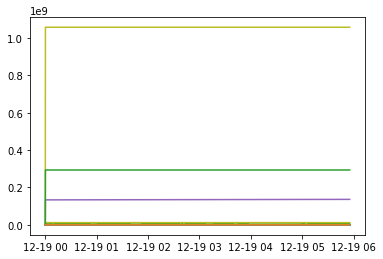

In [4]:
for channel in df.columns:
    df[channel] = gaussian_filter1d(df[channel].to_numpy(), 0.5)

plt.plot(df)

In [17]:
first_quartiles = df.quantile(q = 0.25, axis = 0)
third_quartiles = df.quantile(q = 0.75, axis = 0)
iqr = third_quartiles - first_quartiles

for channel in df.columns:
    df[channel].loc[df[channel] > third_quartiles[channel] + 1.5 * iqr[channel]] = np.NAN
    df[channel].loc[df[channel] < first_quartiles[channel] - 1.5 * iqr[channel]] = np.NAN

df_interpol = df.interpolate()

df_interpol = df_interpol.replace(np.NAN, 0)

df_interpol

,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,ch_107,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
datetime,,,,,,,,,,,,,,,,,,,,,
2009-12-19 00:00:00.000000,63.545044,12.117842,0.0,0.0,0.0,8.619912,0.0,0.000000,0.618820,0.0,...,202.117996,-49.185467,0.0,5.818096,0.0,-19107.113281,0.0,0.0,36352.484375,0.0
2009-12-19 00:00:00.120000,66.923576,12.228759,0.0,0.0,0.0,9.590326,0.0,0.000000,0.688485,0.0,...,212.889877,-51.811813,0.0,6.127883,0.0,-20161.355469,0.0,0.0,37509.527344,0.0
2009-12-19 00:00:00.240000,73.527786,12.444926,0.0,0.0,0.0,11.539531,0.0,0.000000,0.828418,0.0,...,233.953430,-56.956367,0.0,6.733503,0.0,-22226.753906,0.0,0.0,39750.621094,0.0
2009-12-19 00:00:00.360000,83.060593,12.755399,0.0,0.0,0.0,14.479139,0.0,0.000000,1.039451,0.0,...,264.391815,-64.398407,0.0,7.607821,0.0,-25219.318359,0.0,0.0,42937.132812,0.0
2009-12-19 00:00:00.480000,95.097710,13.145394,0.0,0.0,0.0,18.414679,0.0,0.000000,1.321982,0.0,...,302.897491,-73.831810,0.0,8.712071,0.0,-29018.519531,0.0,0.0,46878.542969,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-19 05:55:24.480813,994.269592,185.254456,768.0,128.0,136420672.0,0.000000,-107.5,10.276490,9.287168,0.0,...,-1817.503296,-803.339233,0.0,21.763659,512.0,-30556.792969,198400.0,0.0,89600.000000,8756.0
2009-12-19 05:55:24.600813,993.833069,185.778824,768.0,128.0,136420688.0,0.000000,-107.5,10.276864,9.287224,0.0,...,-1817.794922,-803.715332,0.0,21.764439,512.0,-30597.740234,198400.0,0.0,89600.000000,8756.0
2009-12-19 05:55:24.720813,993.486328,186.186172,768.0,128.0,136420688.0,0.000000,-107.5,10.277163,9.287267,0.0,...,-1817.901245,-804.244446,0.0,21.765064,512.0,-30629.794922,198400.0,0.0,89600.000000,8756.0


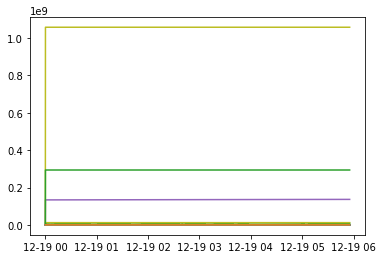

In [18]:
plt.plot(df_interpol)